# Logistic Regression and Classification problems

This notebook will introduce you to the basics of logistic regression, guide you through a naive implementation of the algorithm, and teach you the basics of the SciKit-learn data analysis library via comparing our naive model with their implementation. At the end of the notebook we will look at a dataset and go through an initial qualitative analysis routine.

### Assumptions


* Assume a binary outcome of the dependent variable $y$ (1/0, yes/no, dead/alive, false/true)
* Only non-collinear (mutually independent) variables $x_i$ (features) are included
* Expect a linear dependence between the variables $x_i$ and the log odds
* The training dataset should be sufficiently large if logistic regression is to be effective

### Plan for today
1. KNN Classifier
2. Logistic Classifier
3. Comparison with scikit implementation
4. Short project

### How to learn anything?

* *Don't be afraid, make mistakes, and ask questions.*
* *Practice makes perfect*. Initially you will be making mistakes, the more you practice the sooner you will become a pro.
* If you don't understand something, first compose the question properly, think about it, and if you can't think of a solution ask someone!
* Before you execute any cell, stop and try to predict what it will do! Ideally write your prediction on a piece of paper!
* Experiment! Change the code in the cells, try various test cases to understand how the code behaves.

## 1.  KNN classification

In K-nearest neighbour classification, the predicted label for an unknown datapoint is interpolated from its K nearest neighbours. Naive implementation of a precise k-nearest neighbour classifier is incredibly simple, let's look at it!

Initially, we need to import some data. We will be using the glass type dataset. Below you can see the structure of five randomly sampled datapoints from the set - it is useful to get used to the pandas library.

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("glass.csv") # importing the data from the .csv file
dataset.sort_values('Al', inplace=True) # sort by ascending "Al" values
dataset.head() # print the first 5 rows

Before starting we will add another label to the dataset, if binary is equal to 0 the glass cannot be recycled. If binary equals 1 then it is possible to recycle the glass type.

In [ ]:
dataset['binary'] = dataset.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

In KNN, it is trivial to implement a multidimensional classifier, that's why we will consider all features.

In [ ]:
knn_data = np.stack((dataset["RI"],dataset["Na"],dataset["Mg"],dataset["Al"],dataset["Si"],dataset["K"],dataset["Ca"],dataset["Ba"],dataset["Fe"], dataset["binary"]), axis=-1)

Write a function ```distance(p, data, D)``` that returns an array of distances between the point ```p``` and each point in the dataset ```data```. Assume a ```D```-dimensional Euclidean metric. In other words, the distance is generalised as:
$$D^2 = \sum_i x_i^2$$

In [ ]:
#CODE HERE

Use pandas to split the data into a training set and a test set at a ratio of 80:20.

In [ ]:
#CODE HERE

Plot the "Mg" training values against the "Si" training values. Let points with binary value '1' be red, and points with binary value '0' be black. Also include the test points in blue colour.

In [ ]:
#CODE HERE

Write a function ```knn_search(p, trainingset, k)``` that returns the indices of the ```k``` closest neighbours around the point ```p```, use the ```distance``` function implemented in previous task!

In [ ]:
#CODE HERE

Write a code that looks at the labels of the closest neighbours, and chooses the most frequent label as its output. This is your predicted value for the point ```p```.

In [ ]:
# CODE HERE

Use the code to make a prediction about the labels in the testing set, calculate the accuracy, sensitivity, and specificity of this model. Don't forget that the data is not 2-dimensional, the above plot is only illustrative!

In [ ]:
# CODE HERE

Choose a metric you would like to optimise, and plot its value as a function of the ```k``` hyperparameter.

In [ ]:
# CODE HERE

Consider the dataset carefully now - is this classifier biased? Can the bias of the classifier be decreased by transforming the dataset? (subtracting the mean / normalising the distribution)

Try normalising the dataset and test its new accuracy!

In [ ]:
# CODE HERE

## 2. Implementation of logistic regression

In order to begin, use matplotlib and numpy to plot the logistic function $\phi(z)$ over a sufficiently long range of $z$-values to showcase its behaviour. $$\phi(z) = \frac{1}{1 + exp(-z)}$$
    

In [ ]:
# CODE HERE

In [2]:
# Solution
import matplotlib.pyplot as plt
import numpy as np

def logit(z):
    """ Logistic function """
    return 1 / (1 + np.exp(-z))

logit = np.vectorize(logit)
xvals = np.linspace(-10,10, 1000)

plt.plot(xvals, logit(xvals))
plt.ylabel("$logit(z)$")
plt.xlabel("z")
plt.grid()

Assuming the input data has a single independent variable $x$ (feature) and a binary outcome $y$, the maximum likelihood $L(\alpha_0, \alpha_1)$ becomes: 

$$L(\alpha_0, \alpha_1) = \prod_{i} P(x_i)^{y_i}\left(1-P(x_i)\right)^{1-y_i},$$

where the product runs over all the datapoints $i$, and $P(\vec{x})$ is the logistic probability function. Log-likelihood can then be expressed as: 

$$l(\alpha_0,\alpha_1) = \sum_{i=1}^n - \log\left(1 + \exp({\alpha_0 + \alpha_1 x_i})\right) + \sum_{i=1}^n y_i(\alpha_0 + \alpha_1 x_i),$$

and the partial derivatives of the log-likelihood:


$$\frac{\partial l}{\partial \alpha_0} = -\sum_{i=1}^n y_i - P(x_i; \alpha_0, \alpha_1)\qquad\text{and}\qquad \frac{\partial l}{\partial \alpha_1} = -\sum_{i=1}^n \left(y_i - P(x_i; \alpha_0, \alpha_1)\right)x_{i}$$

As before, to find the optimal parameters $\alpha_0, \alpha_1$ we will code a function minimiser. In this lecture we will implement a simple gradient-descent, this is an important step in your journey. The more confident can google the Newton-Raphson minimiser and implement it instead.

In [ ]:
""" Code the functions beneath:
    data -> a two-dimensional numpy array consisting of (x_i, y_i) pairs
    weights -> a numpy array with the weights (alpha_0, alpha_1)
"""

def logit(z):
    """ The logistic probability function """
    return ???

def loglike(data, weights):
    """ Log-likelihood function with one dependent variable"""
    return ???

def gradient_0(data, weights):
    """ Partial derivative with respect to alpha 0 """
    return ???

def gradient_1(data, weights):
    """ Partial derivative with respect to alpha 1 """
    return ???

In [3]:
# Solution
# Define the functions to be used in the minimisation

def logit(z):
    """ The logistic probability function """
    return 1 / (1 + np.exp(-z))

def loglike(data, weights):
    """ Log-likelihood function with one dependent variable"""
    return np.sum(-np.log(1 + np.exp(weights[0] + weights[1]*data[:,0]))) + np.sum(data[:,1]*(weights[0] + weights[1]*data[:,0]))

def gradient_0(data, weights):
    """ Partial derivative with respect to alpha 0 """
    return -np.sum(data[:,1] - logit(weights[0] + weights[1]*data[:,0]))

def gradient_1(data, weights):
    """ Partial derivative with respect to alpha 1 """
    return -np.sum((data[:,1] - logit(weights[0] + weights[1] * data[:,0])) * data[:,0])

Numpy can be used to convert functions into their vectorised forms that act on whole arrays:

In [4]:
logit = np.vectorize(logit)
loglike = np.vectorize(loglike)

The next step is to write the minimiser function, in multivariate gradient descent it is important that all directions are updated simultaneously, i.e. the updates should not be done sequentially. Calculate the steps required in each direction, store them in an array, and update the positions all at once! It increases the convergence speed of the algorithm.

In [ ]:
def minimise(derivative_0, derivative_1, data, initVals, learning_rate, tolerance):
    current_guess = initVals
    adjustment = np.full_like(current_guess, 1)
    
    while :
        adjustment[0] = ???????
        adjustment[1] = ???????
        current_guess = current_guess + adjustment
    
    return current_guess

In [5]:
# Solution
def minimise(func, grad_0, grad_1, data, guess, step, tolerance):
    current_guess = guess
    adjustment = np.full_like(current_guess, 1)
    
    while np.linalg.norm(adjustment) > tolerance:
        adjustment[0] = - step * grad_0(data, current_guess)
        adjustment[1] = - step * grad_1(data, current_guess)
        current_guess = current_guess + adjustment
        
    return current_guess

In order to see if our code works, we will be using the following dataset: https://www.kaggle.com/uciml/glass. Putting it all together:
    - Import the dataset
    - Guess the weights $\alpha_0, \alpha_1$
    - Run the multivariate gradient descent on the cost function
    - Use the weights to predict the outcome probabilities on the data set
    - Evaluate the accuracy
    
We start by using pandas to import the dataset, and then have a quick look at a few entries to get the overall feel for the structure:

In [6]:
import pandas as pd

dataset = pd.read_csv("glass.csv") # importing the data from the .csv file
dataset.sort_values('Al', inplace=True) # sort by ascending "Al" values
dataset.head() # print the first 5 rows

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


As a data scientist, it is important to first do an "exploratory analysis" looking at the dataset and gaining qualitative understanding of the underlying rules before applying any quantitative models. Because we are only testing our code here, we will skip this part, and I will artificially claim that the only important feature is the aluminum content "al". Don't worry, we will do some full-fledged dataset analysis later on!

We can now plot the binary response vs the independent variable "al", uhm, I mean, you can! Plot the first column of the "data" array vs the second column. Don't forget to label the axes!

In [7]:
import matplotlib.pyplot as plt

dataset['binary'] = dataset.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
data = np.stack((dataset["Al"], dataset["binary"]), axis=-1)

In [ ]:
# CODE HERE

Text(0, 0.5, 'Binary outcome')

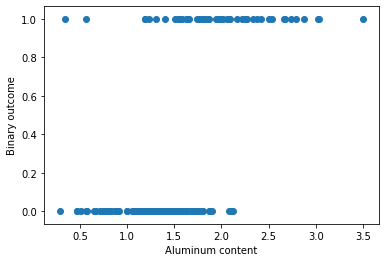

In [8]:
# Solution
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Aluminum content")
plt.ylabel("Binary outcome")

By now we have prepared everything necessary to employ our code for naive logistic regression. Use the functions you have implemented, find a good value for the learning rate, tolerance, and the initial weights in order to find the best fit.

In [ ]:
# CODE HERE

In [9]:
# Solution
guess = np.array((0., 4.180403861451090))
step = 0.001
tolerance = 0.0000001

weights = minimise(loglike, gradient_0, gradient_1, data, guess, step, tolerance)

print(weights)

[-7.71346068  4.18032866]


Once you know the weights, use your knowledge of the logistic model to plot the data, along with the probability $P(x_i)$.

In [ ]:
# CODE HERE

Text(0, 0.5, 'Binary outcome')

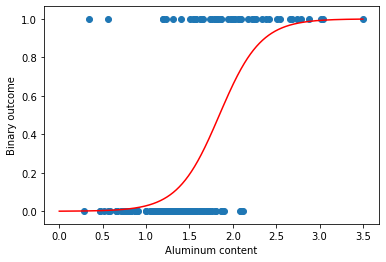

In [10]:
# Solution
x_pred = np.linspace(0, 3.5, 1000)
y_pred = logit(weights[0] + weights[1]*x_pred)

plt.scatter(data[:,0], data[:,1])
plt.plot(x_pred, y_pred, color="red")
plt.xlabel("Aluminum content")
plt.ylabel("Binary outcome")

It is important to remember the interpretation of the logit function, it is the probability that a feature with the associated Aluminum content has the binary outcome $1$. If we wanted to make a prediction of the binary outcome, we would set a threshold at $\text{logit}(z) = 0.5$ and set anything larger to $1$, and anything smaller to $0$. Do just that, and plot the result alongside the data.

In [ ]:
# CODE HERE

Text(0, 0.5, 'Binary outcome')

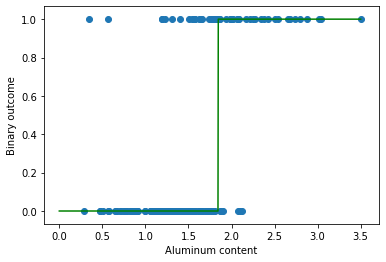

In [11]:
# Solution
y_final = np.where(y_pred > 0.5, 1, 0)
plt.plot(x_pred, y_final, color="green")
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Aluminum content")
plt.ylabel("Binary outcome")

While this may work here, it is not always the case that the threshold should be set to $0.5$. If the dataset you work with is unbalanced, i.e. it is much rarer to find a $1$ outcome than $0$, then it is reasonable to base your threshold value off of the ROC curve. It is not a good idea to use the accuracy as your metric of choice for unbalanced datasets.

## 3. Comparison to SciKit-learn implementation

We can now compare your code's prediction to the prediction made by the implementation of logistic regression in the scikit-learn library:

In [12]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1e9)

In the above, we set only a single parameter for the logistic classifier. C is the inverse of regularisation strength, thus we set the regularisation effectively to zero. This way we can compare the SciKit implementation to our naive implementation.

In [13]:
X = data[:,0].reshape(-1,1)
y = data[:,1]
logistic.fit(X, y)
dataset['predicted'] = logistic.predict(X)

The features data[:,0] had to be reshaped, because the LogisticRegression.fit() function is built to accept models with multiple features. Therefore each value has to be converted into an array with a single element. Now we can plot the predicted values!

In [ ]:
plt.scatter(dataset.Al, dataset.binary)
plt.plot(dataset.Al, dataset.predicted, color='red')
plt.xlabel('Aluminum content')
plt.ylabel('Binary outcome')

Similarly, the sklearn can be used to predict the probabilities:

In [ ]:
dataset["probability"] = logistic.predict_proba(data[:,0].reshape(-1,1))[:, 1]

Plot the probabilities predicted by the SciKit library, and alongside them the probabilities predicted by your custom logistic regression implementation. Provide a quantitative description of how similar the two predictions are.

In [ ]:
# CODE HERE

In [ ]:
# Solution
plt.scatter(dataset.Al, dataset.binary)
plt.plot(dataset.Al, dataset.probability, color='red', linewidth=3.0)
plt.plot(x_pred, y_pred, color='green', linestyle='dashed', linewidth=3.0)
plt.xlabel('Aluminum content')
plt.ylabel('Binary outcome')

Compare the time it takes your implementation to run against the scikit implementation, for this you can use the timeit library in python. Search it up!

In [ ]:
# CODE HERE

*Advanced Problems:*
    - Generalise your logistic regression code to accept multiple features with a binary outcome
    - Implement a regularisation scheme, can you compare your regression with the SciKit library for different regularisation strengths?
    - Google "Softmax" regression, can you implement the equivalent of logistic regression for multiple features *and* multiple outcomes?
 

## 5.  Problem solving (short project)

In this part we will look at a dataset with multiple variables using SciKit-Learn, the specific dataset in question is the Telco Customer churn dataset provided by IBM Sample Data Sets at https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/. Our goal is explained on the website, "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Use pandas to import the dataset, look at a sample of the data to understand the structure.

In [ ]:
# CODE HERE

The dataset is rather extensive, but the overall structure of the information provided can be summarised as follows:
    - Outcome: If the customer left last month (Yes / No) corresponding to the column header "Churn"
    - Demographics: Gender, age (column SeniorCitizen), family status (columns Partner, Dependents)
    - Account information: TotalCharges, PaymentMethod, MonthlyCharges, PaperlessBilling, Contract, Tenure
    - Services: StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineSecurity, InternetService, MultipleLines, PhoneService
    
Now we will proceed to do some exploratory analysis. When working with a new dataset, it is always good to look for missing values in any of the columns.

Use pandas and matplotlib to plot a bar chart with the number of missing values per column:

In [ ]:
# CODE HERE

There are only 11 values missing in the category "TotalCharges", in a dataset of 7043 datapoints we can easily discard the incomplete rows. If the dataset was smaller, we would have to replace these blank spaces with a statistic of the overall dataset. The statistic depends on whether or not the values or missing at random, completely at random, or not at random. Remove the missing rows:

In [ ]:
# CODE HERE

Plot the churn, what percentage of the clients has cancelled their subscription over the last month?

In [ ]:
# CODE HERE

Now we can use the categorical variables, and see how churn depends on the category. To do this faster, we will use a function that will plot the relevant graphs:

In [ ]:
def plot_bar(dataset, var):
    
    values = dataset[var].unique()
    percentages = np.zeros(len(values))
    
    for i in range(len(values)):
        percentages[i] = dataset.loc[dataset[var] == values[i]]["Churn"].eq("Yes").sum()
        
    percentages = 100*percentages/(len(dataset))
    
    ax = plt.bar(np.arange(len(values)), percentages)
    plt.xticks(np.arange(len(values)), values)
    plt.ylabel("Churn per month [%]")
    
    return ax 

### Gender dependence

In [ ]:
plot_bar(dataset, 'gender')

Plot the other graphs:

### Age dependence

In [ ]:
# CODE HERE

### Partner

In [ ]:
# CODE HERE

### Dependents

In [ ]:
# CODE HERE

### Phone Service

In [ ]:
# CODE HERE

### Multiple Lines

In [ ]:
# CODE HERE

### Internet Service

In [ ]:
# CODE HERE

### Online Security

In [ ]:
# CODE HERE

### Device Protection

In [ ]:
# CODE HERE

### Tech Support

In [ ]:
# CODE HERE

### Streaming TV

In [ ]:
# CODE HERE

### Streaming Movies

In [ ]:
# CODE HERE

### Contract

In [ ]:
# CODE HERE

### Paperless Billing

In [ ]:
# CODE HERE

### Payment Method

In [ ]:
# CODE HERE

Use the above graphs to perform a qualitative analysis of the dataset, which features seem to strongly relate to the churn rate? Which features seem unimportant?

*WRITE YOUR FINIDINGS HERE*

The next step is to visualise the remaining three continuous variables, this is usually done in one of two ways:
    - Box plot
    - Histogram

### Tenure

In [ ]:
left = dataset.loc[dataset['Churn'] == "Yes"].tenure
right = dataset.loc[dataset['Churn'] == "No"].tenure

plt.boxplot([left.values, right.values], [1,2])
plt.xticks([1,2], ["Yes", "No"])
plt.ylabel("Churn per month [%]")

We can also show this in a histogram!

In [ ]:
plt.subplot(2,1,1)
plt.hist(right, bins=10)
plt.ylabel("Stayed [people]")
plt.xlabel("Tenure")

plt.subplot(2,1,2)
plt.hist(left, bins=10)
plt.ylabel("Left [people]")
plt.xlabel("Tenure")

### Monthly Charges

In [ ]:
# CODE HERE

### Total Charges

In [ ]:
# CODE HERE

Deduce the findings from the above three plots:

*WRITE YOUR FINIDINGS HERE*

When working with continuous variables, it is also a good idea to look for correlations between them.

In [ ]:
dataset["TotalCharges"] = dataset["TotalCharges"].astype(np.float) 
dataset[["TotalCharges", "MonthlyCharges", "tenure"]].corr()

We can see that the tenure strongly correlates with total charges, this is fairly obvious and intuitive. Similarly, we see that the tenure has little correlation with the monthly charges. It is often nice to visualise the correlations by colours:

In [ ]:
plt.imshow(dataset[["MonthlyCharges", "TotalCharges", "tenure"]].corr(), cmap="rainbow")
plt.xticks([0,1,2], ["MonthlyCharges", "TotalCharges", "tenure"])
plt.yticks([0,1,2], ["MonthlyCharges", "TotalCharges", "tenure"])
plt.colorbar()

### Preparing data for logistic regression

Change all the "Yes" and "No" values in the dataset to $1$ and $0$ respectively. Some categories have more than two options, for example the StreamingMovies feature also has the option "No internet service". You can bundle those with the "No" values, is there any problem with giving that feature a new number, for example $2$? 

In [ ]:
# CODE HERE

Standardise the continuous variables by taking each, subtracting their mean, and dividing by the standard deviation. Doing this reduces the multicollinearity between the variables, and allows our model to predict its coefficients more precisely.

In [ ]:
# CODE HERE

It is also possible to derive new features from the current features, if you wish you can try creating some new that you think may be of interest. For example, only a few clients will have the exact same tenure, you can bin together all clients that have their tenure betwee 1-2 years, 3-4 years, etc. Similarly it may be interesting to do similar things for the monthly charges.

In [ ]:
# CODE HERE

### Logistic regression

Now we can apply logistic regression to the prepared dataset, start by applying vanilla logistic regression from the sklearn library, with no regularisation. Build the model using all features of the dataset, train it on $80\%$ of the rows. Print out a table of the coefficients for each feature:

In [ ]:
# CODE HERE

Set the threshold to $0.5$, and use the built model to predict outcomes of the remaining $20\%$, plot the confusion matrix.

In [ ]:
# CODE HERE

Because we are dealing with a balanced dataset, you can calculate the accuracy, specificity, and sensitivity for a number of thresholds between $0$ and $1$, plot the resulting values vs. threshold:

In [ ]:
# CODE HERE

Can you use the above plot to estimate the best threshold value? Use it on the test set and print the confusion matrix.

In [ ]:
# CODE HERE

*Advanced Problems*:
    - It is ideal to include as few features as possible, look at AIC feature selection and include it in your model
    - Use the ROC curve to choose your threshold value\
    - Cross-validate your results using the k-fold crossvalidation, make sure you are working with balanced subsets!